In [1]:
!pip install pyradiomics
!pip install SimpleITK 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.5 MB 192 kB/s 
     |████████████████████████████████| 52.7 MB 72.1 MB/s 
     |████████████████████████████████| 109 kB 63.8 MB/s 
     |████████████████████████████████| 555 kB 50.8 MB/s 
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp38-cp38-linux_x86_64.whl size=178970 sha256=a403511c6b8fecf4d096be5555f1ad0ef97649d613a55846cb078bc4e9bfe8a2
  Stored in directory: /root/.cache/pip/wheels/df/be/06/5d09092e41d20673137f10ae62fb8d9da9adf14ce2552d7bea
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=50b1d5bd172d8a837409dd9b9d84f19d58133704b54ab107fc765646fe03b1cd
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built pyradiomics docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import SimpleITK as stk
from radiomics import featureextractor
import six
import nibabel as nib


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
DATADIR = "/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing"
# CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
IMG_SIZE = 150

num_img={}
for dir in os.listdir(DATADIR):
  num_img[dir]=(os.listdir(os.path.join(DATADIR,dir)))

In [ ]:
# os.mkdir('/content/gdrive/MyDrive/ENPM809KF/Data2/train3')

In [ ]:
os.listdir(folder)

NameError: ignored

In [78]:
a=[]
from PIL import Image
import os
print("Shrink images in the folder")
folder = "/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing/meningioma_tumor"
folder1='/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing/Resize/Meningioma'
w = 512
h = 512
ct = 0
ct1 = 0
for i in os.listdir(folder):
    ct1 += 1
    file = f"{folder}/{i}"
    im = cv2.imread(file)
    if im is None: continue
    im = cv2.resize(im, (w, h))
    # a.append(im)
    a.append(im)
    file1 = f"{folder1}\\{i}"
    # new_img.putdata(a)
    k = cv2.imwrite(file1, im)
    if not k: 
      print('DS')
      break

    ct += 1

print(ct, ct1)

# # a.append(im)    
# print(im.size)
# file1 = f"{folder1}\\{i}"


Shrink images in the folder
306 306


In [ ]:
!fusermount -u drive
!google-drive-ocamlfuse drive

fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found


In [5]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(DATADIR))
for name in classes:
  classes_info[name] = len(os.listdir(DATADIR + f'/{name}'))
  print(classes_info)
  fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
  fig.update_layout({'title':{"x":0.1}})
  fig.show()

{'Test': 2}


{'Test': 2, 'glioma_tumor': 300}


{'Test': 2, 'glioma_tumor': 300, 'meningioma_tumor': 306}


{'Test': 2, 'glioma_tumor': 300, 'meningioma_tumor': 306, 'no_tumor': 405}


{'Test': 2, 'glioma_tumor': 300, 'meningioma_tumor': 306, 'no_tumor': 405, 'pituitary_tumor': 300}


In [6]:
glio_test = os.listdir("/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing/glioma_tumor")
# notumor_train = os.listdir("/content/gdrive/MyDrive/ENPM809KF/Data2/Training/no_tumor")

In [79]:
# import required module
import glob
b=[]
# get the path/directory
folder_dir1 ="/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing/Resize"
 
# iterate over files in
# that directory
for images in glob.iglob(f'{folder_dir1}/*'):
   
    # check if the image ends with png
    if (images.endswith(".jpg")):
        b.append(images)

In [81]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

load_images_from_folder(DATADIR)

[]

In [82]:
def read_img_sitk(img_path):
    image_data = stk.ReadImage(img_path,stk.sitkInt8)
    return image_data

In [83]:
def centre_of_tumor(input_image,input_mask):
  extractor = featureextractor.RadiomicsFeatureExtractor()
  input_mask = stk.GetImageFromArray(np.ones((512,512)))
  result = extractor.execute(input_image, input_image)
  centre_of_mass = []
  for key, value in six.iteritems(result):
    if key == 'diagnostics_Mask-original_CenterOfMassIndex':
      centre_of_mass.append(value[0])
      centre_of_mass.append(value[1])
  return centre_of_mass

In [ ]:
path="/content/gdrive/MyDrive/ENPM809KF/Data2/Training/no_tumor/Tr-no_0165.jpg"
# im = cv2.imread(path)

print(type(im))
# <class 'numpy.ndarray'>

print(im.size)
# print(type(im.shape))

<class 'numpy.ndarray'>
786432


In [ ]:
from tqdm import tqdm

In [84]:
img2=[]
mask2=[]
com=[]
ct, ct1 = 0,0
for i in range(len(b)):
  img = read_img_sitk(b[i])
  img2.append(img)
  ct += 1
  try:
    centre2 = centre_of_tumor(img, img)
    com.append(centre2)
  except:
    ct1 += 1
    print(1)
    continue

  # print('Centre of mass :', centre)
com

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 

1


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featuree

1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureex

1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureex

1


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': Non

1


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featuree

1


INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating 

1


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': Non

1


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimu

1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureex

1


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': Non

1


INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featuree

1


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
INFO:radiomics.featureextractor:Computing glcm
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': Non

1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureex

1


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
INFO:radiomics.featureextractor:Computing gldm
INFO:radiomics.featureextractor:Computing glrlm
INFO:radiomics.featureextractor:Computing glszm
INFO:radiomics.featureextractor:Computing ngtdm
INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureex

[[247.39473684210526, 270.89473684210526],
 [250.25201677960632, 288.6631171345595],
 [216.86588482934897, 67.09547436475718],
 [336.7142857142857, 194.0],
 [266.47457627118644, 261.35883777239707],
 [299.41824862216777, 217.01041028781384],
 [250.71861471861473, 279.7799847211612],
 [267.73031777841396, 261.0074434583453],
 [264.17589476904254, 210.86479045579688],
 [265.44591287322567, 331.9145048131832],
 [251.0680924287119, 177.80162241887905],
 [198.40387481371087, 302.5373642750692],
 [257.03752577319585, 163.69690721649485],
 [255.33854907539117, 232.4452347083926],
 [266.5310734463277, 273.8813559322034],
 [256.52353585112206, 270.5738916256158],
 [200.83768267223383, 232.77296450939457],
 [25.0, 107.0],
 [254.42041712403952, 168.24478594950602],
 [242.41950113378684, 99.11841773746535],
 [250.13287197231833, 290.69446366782006],
 [278.04795321637425, 154.8541910331384],
 [256.38056397110233, 275.02237240736423],
 [254.19685990338164, 285.6747181964573],
 [256.68245496998, 157.

In [85]:
print(ct, ct1)
len(com)


306 14


292

In [86]:
img1=[]
for i in range(len(b)):

  img = read_img_sitk(b[i])
  img1.append(img)
len(img1)
len(com)

292

In [87]:
m=[]
com1=[]
def crop_images(m,com1,optimal_roi,image_size):
  
  x_roi =int(optimal_roi[0]/2)
  y_roi =int(optimal_roi[1]/2)
  x_centre =round(com1[0])
  #print(x_centre)
  y_centre =round(com1[1])
  #print(y_centre)

  if x_centre - x_roi< 0:
    start_x = 0 
    end_x = optimal_roi[0]
  elif x_centre + x_roi >= image_size[0]:
    end_x = image_size[0] - 1
    start_x = end_x - optimal_roi[0]
  else:
    start_x = x_centre - x_roi
    end_x =  x_centre + x_roi

  if y_centre - y_roi< 0:
    start_y = 0 
    end_y = optimal_roi[1]
  elif y_centre + y_roi >= image_size[1]:
    end_y = image_size[1] - 1
    start_y = end_y - optimal_roi[1]
  else:
    start_y = y_centre - y_roi
    end_y =  y_centre + y_roi
  
  cropped_img = m[start_x:end_x,
                     start_y:end_y,
                    ] 
                    
  return cropped_img

In [88]:
from google.colab.patches import cv2_imshow
optimal_roi = [256,256,128]
image_size = [512,512,3]
croped_img=[]
croped_mask=[]
for i in range(len(com)):
  # fig, ax = plt.subplots(2,2)
  croped_img.append(crop_images(img2[i],com[i],optimal_roi,image_size))
  


(0.01, 400.0, 0.0, 20000.0)

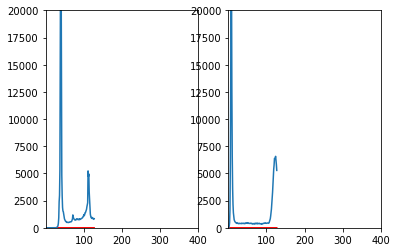

In [89]:
img1 = read_img_sitk(b[0])
img2 = read_img_sitk(b[1])
     
from skimage.exposure import histogram
from skimage import exposure, util

fig, (ax1,ax2) = plt.subplots(1, 2)
img1_array = stk.GetArrayFromImage(img1)
img2_array = stk.GetArrayFromImage(img2)
hist1, hist_centers1 = histogram(img1_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(img1_array)
hist2, hist_centers2 = histogram(img2_array,nbins=256)
img_cdf2, bins2 = exposure.cumulative_distribution(img2_array)
ax1.plot(bins1, img_cdf1, 'r')
ax1.plot(hist_centers1, hist1)
ax2.plot(bins2, img_cdf2, 'r')
ax2.plot(hist_centers2, hist2)
ax1.axis([0.01, 400, 0, 2e4])
ax2.axis([0.01, 400, 0, 2e4])

In [90]:
def rescale(image):
  filter = stk.RescaleIntensityImageFilter()
  filter.SetOutputMaximum(300)
  filter.SetOutputMinimum(0)
  rescaled_img = filter.Execute(image)
  return rescaled_img


In [91]:
rescaled_img1 = rescale(img1)
rescaled_img2 = rescale(img2)

(0.01, 300.0, 0.0, 100000.0)

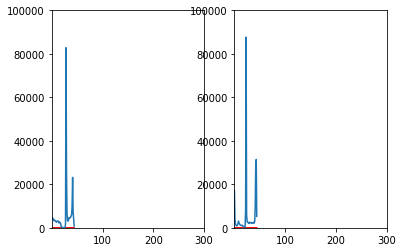

In [92]:
fig, (ax1,ax2) = plt.subplots(1, 2)
rescaled_img1_array = stk.GetArrayFromImage(rescaled_img1)
rescaled_img2_array = stk.GetArrayFromImage(rescaled_img2)
hist1, hist_centers1 = histogram(rescaled_img1_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(rescaled_img1_array)
hist2, hist_centers2 = histogram(rescaled_img2_array,nbins=256)
img_cdf2, bins2 = exposure.cumulative_distribution(rescaled_img2_array)
ax1.plot(bins1, img_cdf1, 'r')
ax1.plot(hist_centers1, hist1)
ax2.plot(bins2, img_cdf2, 'r')
ax2.plot(hist_centers2, hist2)
ax1.axis([0.01, 300, 0, 1e5])
ax2.axis([0.01, 300, 0, 1e5])

In [93]:
#We use mean normalizaation to the data

def maxm_normalization(image):
  image = stk.GetArrayFromImage(image)
  max = np.max(image)
  min = np.min(image)
  final_image = (image - min)/ (max - min)
  final_image = stk.GetImageFromArray(final_image)
  return final_image

In [94]:
len(croped_img)

292

In [95]:
rescaled_img = rescale(croped_img[1])
mean=maxm_normalization(rescaled_img)

(-3.0, 1.0, 0.0, 20000.0)

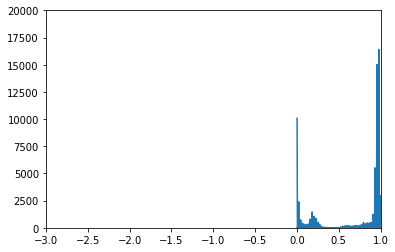

In [74]:
fig, (ax1) = plt.subplots(1, 1)
mean_array = stk.GetArrayFromImage(mean)
hist1, hist_centers1 = histogram(mean_array,nbins=256)
img_cdf1, bins1 = exposure.cumulative_distribution(mean_array)
ax1.plot(bins1, img_cdf1, 'r')
ax1.plot(hist_centers1, hist1)
ax1.axis([-3.0, 1, 0, 2e4])

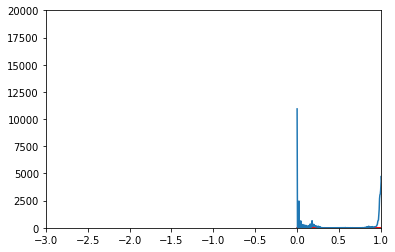

In [96]:
def bias_correction(image):
  image = stk.Cast(image,stk.sitkFloat32)
  corrector = stk.N4BiasFieldCorrectionImageFilter()
  output_corrected = corrector.Execute(image)
  return output_corrected

bias_corrected_img = bias_correction(mean)
bias_corrected_img_array = stk.GetArrayFromImage(bias_corrected_img)
hist, hist_centers = histogram(bias_corrected_img_array,nbins=256)
img_cdf, bins = exposure.cumulative_distribution(bias_corrected_img_array)
plt.plot(bins, img_cdf, 'r')
plt.plot(hist_centers, hist)
plt.axis([-3, 1, 0, 2e4])
plt.show()


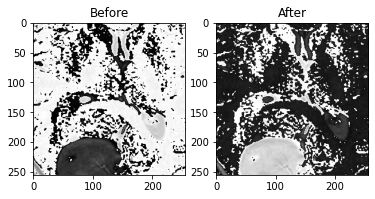

In [97]:
fig, (ax1 , ax2) = plt.subplots(1, 2)
ax1.set_title('Before')
ax2.set_title('After')
ax1.imshow(stk.GetArrayViewFromImage(croped_img[1]), cmap='gray')
ax2.imshow(stk.GetArrayViewFromImage(bias_corrected_img), cmap='gray_r')

In [98]:
from skimage import *
import skimage.io
final_paths = 'Test/Meningioma'
path = os.path.join(folder_dir1, final_paths)

croped_img1=[]
imga=[]
print(len(b))
print(len(com))
for i in range((len(com))):
  imga.append(read_img_sitk(b[i]))
  croped_img1.append(croped_img[i])
  r=rescale(croped_img1[i])
  j=maxm_normalization(r)
  bi=bias_correction(j)
  image_array = stk.GetArrayFromImage(bi)
  image3 = stk.GetImageFromArray(image_array)
  numpydata = np.array(bi).reshape((256,256))
  cv2.imwrite('/content/gdrive/MyDrive/MRI_Dataset/Data2/Data2/Testing/Test/Meningioma/meningioma_tumor_%03d.jpg'% i, numpydata*255/1.4)  

306
292


In [31]:
np.shape(numpydata)

(65536,)